# KMeans (Clusters), PCA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
immo = pd.read_csv('immo_cat.csv')
immo = immo.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden','cellar']
immo[cols] = immo[cols].replace({True:1,False:0})

In [3]:
pd.set_option('display.max_columns', None)
immo.head(1)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,0,0,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,0,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,1,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4,0.4,0.55,0.45,0.51,0.57,0.3,0.95,4.0,0.61


In [4]:
# Import sklearn train_test_split and separate the data.
data_features = immo.drop(['regio1','telekomTvOffer','heatingType','typeOfFlat','houseNumber','geo_bln','scoutId','geo_krs','street','regio2','regio3','geo_plz','date','description','facilities','streetPlain','firingTypes','condition','interiorQual','petsAllowed','noRoomsRange','energyEfficiencyClass'], axis=1)
data_features2 = immo.drop(['serviceCharge','telekomHybridUploadSpeed','pricetrend','totalRent','scoutId','thermalChar','lastRefurbish','Euro/m2','livingSpace','picturecount','telekomUploadSpeed','yearConstructed','noParkSpaces','baseRent','geo_plz','heatingCosts','electricityBasePrice','electricityKwhPrice','regio1','telekomTvOffer','heatingType','typeOfFlat','houseNumber','geo_bln','geo_krs','street','regio2','regio3','date','description','facilities','streetPlain','firingTypes','condition','interiorQual','petsAllowed','noRoomsRange','energyEfficiencyClass'], axis=1)
data_features2.head(3)

,newlyConst,balcony,hasKitchen,cellar,yearConstructedRange,lift,baseRentRange,noRooms,floor,numberOfFloors,garden,livingSpaceRange,price_class,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,noRoomsRange_cat,energyEfficiencyClass_cat
0,0,0,0,1,2.0,0,4,4.0,1.0,3.0,1,4,4,0.4,0.55,0.45,0.51,0.57,0.30,0.95,4.0,0.61
1,0,1,0,0,1.0,0,5,3.0,2.1,3.1,0,4,6,0.4,0.55,0.45,0.58,0.52,0.30,1.00,3.0,0.61
2,1,1,0,1,9.0,1,6,3.0,3.0,4.0,0,4,8,0.4,1.00,0.45,0.38,1.00,0.56,0.95,3.0,0.61


In [5]:
data_features2.dtypes

newlyConst                     int64
balcony                        int64
hasKitchen                     int64
cellar                         int64
yearConstructedRange         float64
lift                           int64
baseRentRange                  int64
noRooms                      float64
floor                        float64
numberOfFloors               float64
garden                         int64
livingSpaceRange               int64
price_class                    int64
typeOfFlat_cat               float64
heatingType_cat              float64
firingTypes_cat              float64
regio1_cat                   float64
condition_cat                float64
interiorQual_cat             float64
petsAllowed_cat              float64
noRoomsRange_cat             float64
energyEfficiencyClass_cat    float64
dtype: object

In [6]:
scaler= StandardScaler().fit(data_features2)
X_prep = scaler.transform(data_features2)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

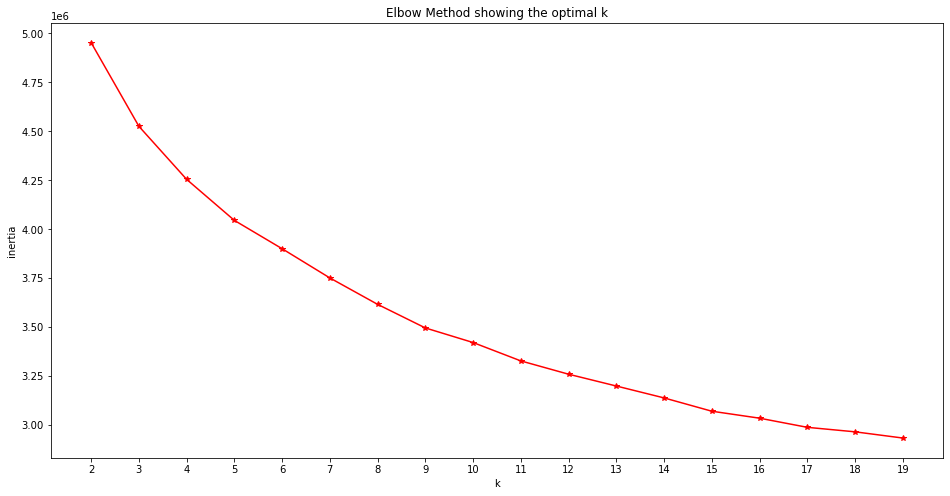

In [8]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')  
#l-bow-point at 6

In [9]:
# from sklearn.metrics import silhouette_score
# K = range(2, 20)
# silhouette = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=42)
#     kmeans.fit(X_prep)
#     silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Silhouette score showing the optimal k')
# # silhouette score: AttributeError: 'NoneType' object has no attribute 'split'

In [10]:
# agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='ward')
# pred = agglomerative.fit_predict(X_prep)

# plt.figure(figsize=(10, 10))
# plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
# #plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
# plt.show()

In [11]:
# # complete linkage penalizes heavily outliers
# agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='complete')
# pred = agglomerative.fit_predict(X_prep)

# plt.figure(figsize=(10, 10))
# plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
# plt.show()

In [12]:
# # different algorithms are good for different applications
# agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='average')
# pred = agglomerative.fit_predict(X_prep)

# plt.figure(figsize=(10, 10))
# plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.3)
# plt.show()

### PCA

In [13]:
pca = PCA()
pca.fit(X_prep)

PCA()

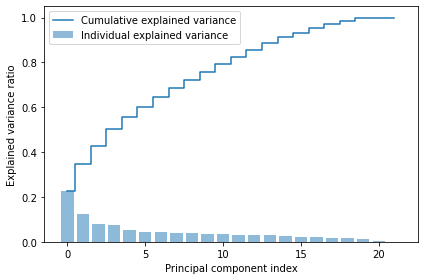

In [14]:
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
X_pca = pca.transform(X_prep)

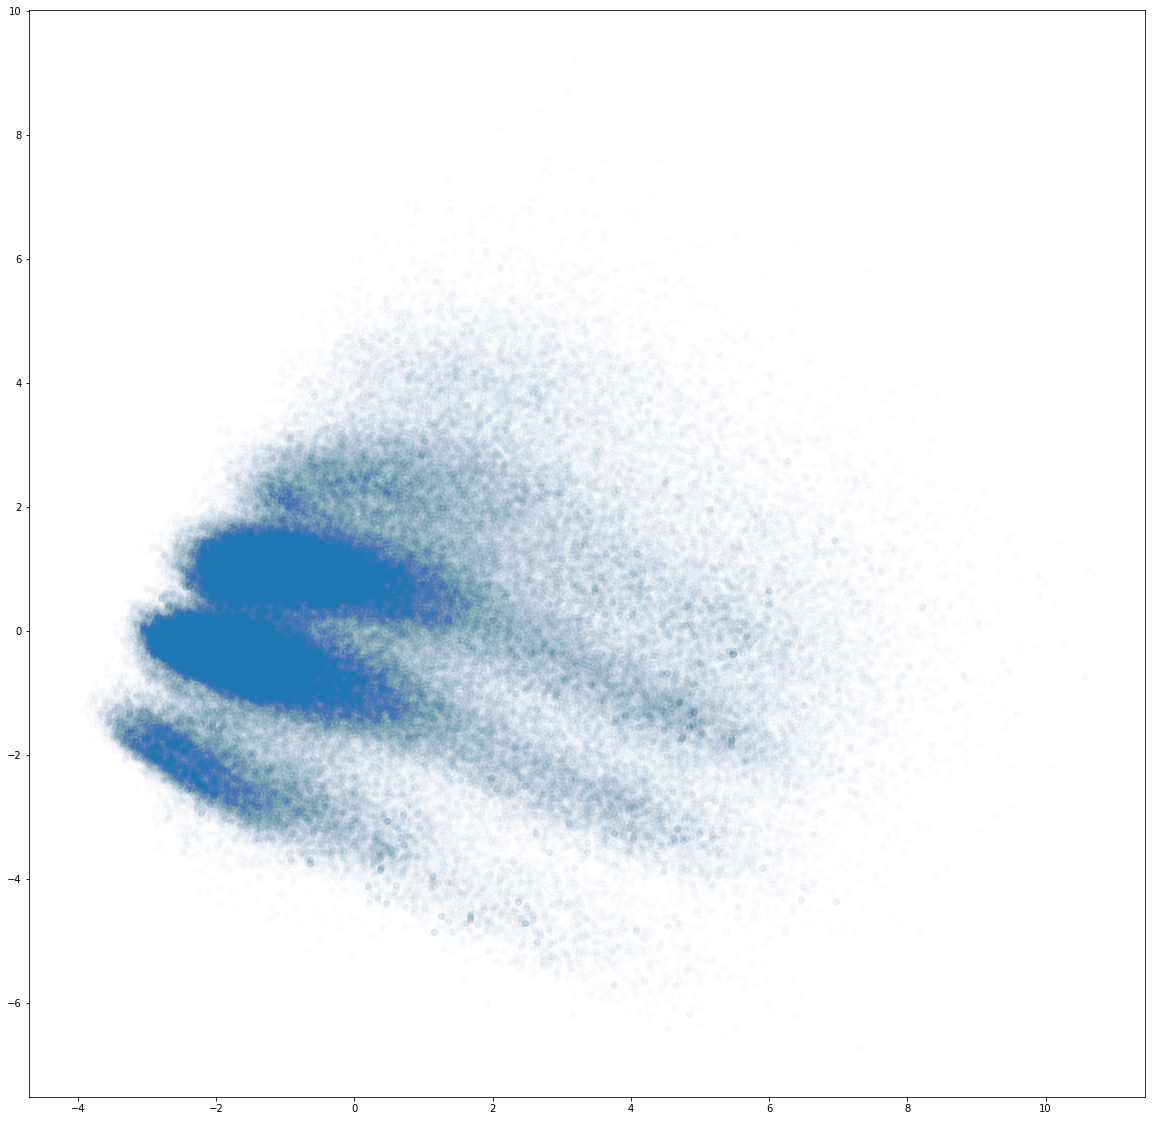

In [22]:
fig = plt.figure(figsize=(20,20))
plt.scatter(X_pca[:,0],X_pca[:,1], alpha=0.01)

Text(0.5, 1.0, 'Correlation of PC scores')

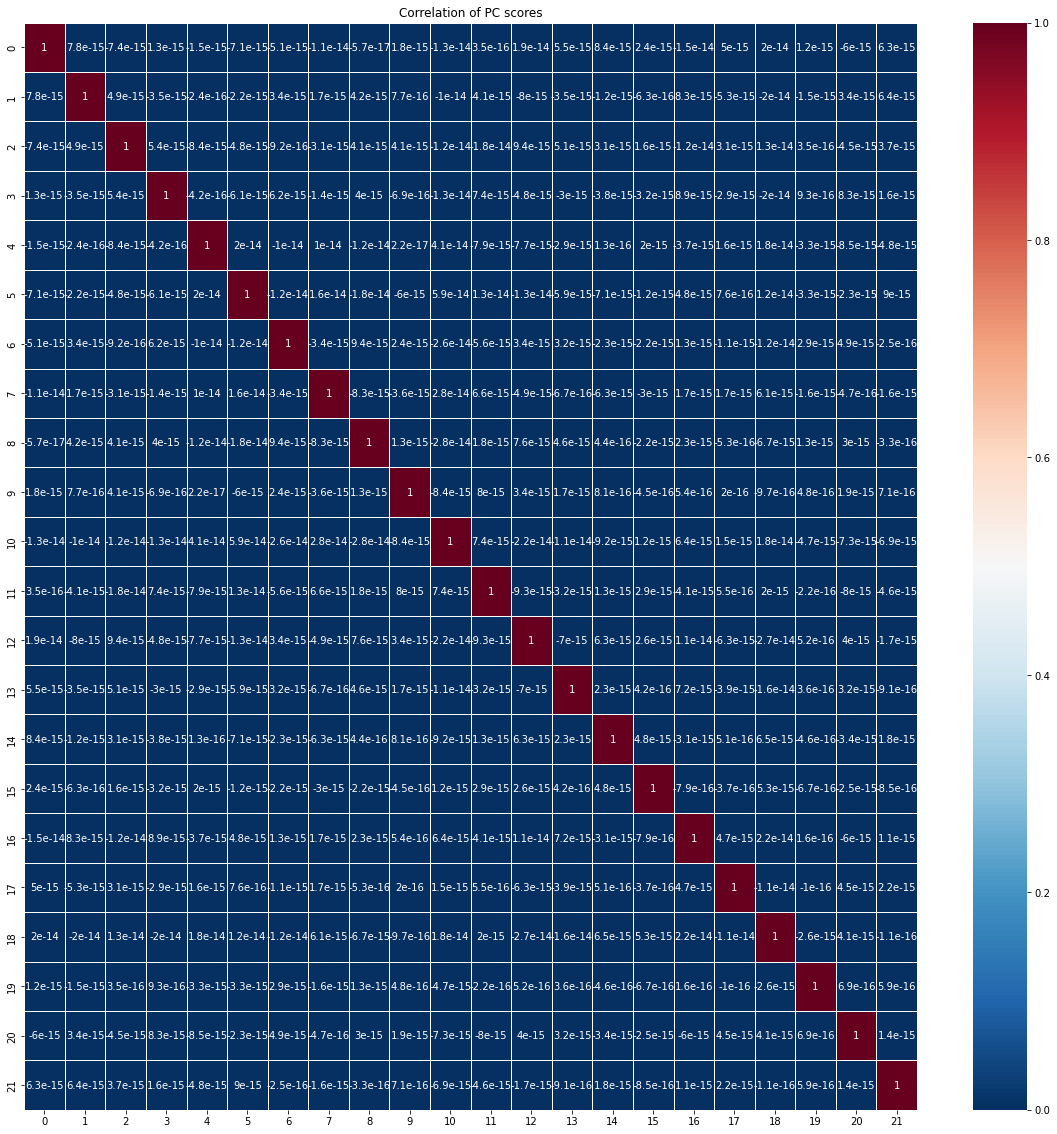

In [17]:
X_train_pca = pca.transform(X_pca)
corr_pc = pd.DataFrame(X_pca).corr()
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

C:\Users\benne\AppData\Local\Temp\ipykernel_18176\2680689482.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


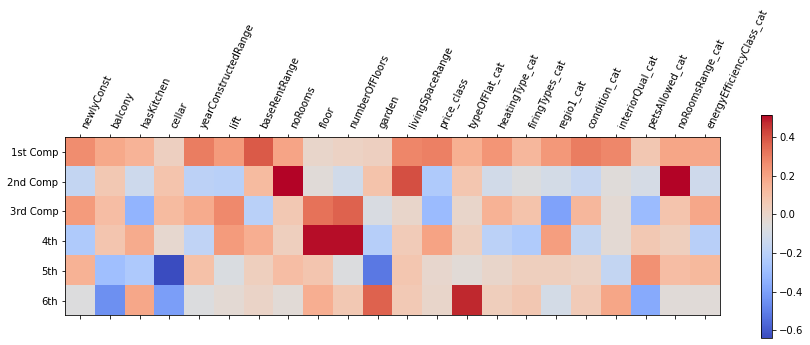

In [18]:
plt.matshow(pca.components_[0:6], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th','5th','6th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data_features2.columns)),data_features2.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [20]:
# clusters = kmeans.predict(X_prep)
# plt.figure(figsize=(10, 10))
# plt.scatter(immo['balcony'], immo['cellar'], c=clusters,alpha=0.25)
# plt.show()

# --> threadpoolctl > 3 !!!

In [ ]:
# data_cluster = pd.concat([immo,pd.Series(clusters)],axis=1)
# data_cluster = data_cluster.rename(columns={0:'clustered'})
# data_cluster.head(3)